In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Ramping with I
ISIs = [0.4] * 4
ISI_pts = np.cumsum(ISIs)

# Constants
I0 = 1.5
beta = 1.5
alpha = 5

# Initialize
IS = I0
IP = I0
y0 = 0.7

# For storage
yS_lst = []
IS_lst = []
IP_lst = []
productions = []

# Synchronization
for i in range(len(ISIs)):
    print(i, ISI_pts[i-1])
    # Period adjustment
    yS = IS * ISIs[i]
    IS_new = IS - beta * (yS - y0)
    print('yS = ', yS, 'IS = ', IS)
    yS_lst.append(yS)
    IS_lst.append(IS_new)
    
    # Make production
    tp = y0 / IP
    productions.append(tp)
    print('tp =  ', tp)
    
    # Phase adjustments
    if i == 0:
        IP = IS_new + alpha * (np.sum(productions) - (y0 / IS))
    else:
        print('*** Production total: ', np.sum(productions))
        print('*** ISI total: ', ISI_pts[i - 1] + y0/IS)
        IP = IS_new + alpha * (np.sum(productions) - (ISI_pts[i - 1] + y0 / IS))
    IS = IS_new
    IP_lst.append(IP)
    print('IP = ', IP)
    
    
# Continuation
n_continuation = 5
continuation_const = 0.1
for i in range(n_continuation):
    # Period adjustment: IS unchanged since no stimulus is observed
    IS_new = IS
    
    # Make production
    tp = y0 / IP
    productions.append(tp)
    print('tp =  ', tp)
    
    # Phase adjustments
    IP = IS_new + alpha * (continuation_const)
    IS = IS_new
    IP_lst.append(IP)
    print('IP = ', IP)
    

    








0 1.6
yS =  0.6000000000000001 IS =  1.5
tp =   0.4666666666666666
IP =  1.65
1 0.4
yS =  0.66 IS =  1.65
tp =   0.42424242424242425
*** Production total:  0.8909090909090909
*** ISI total:  0.8242424242424242
IP =  2.043333333333333
2 0.8
yS =  0.6839999999999999 IS =  1.7099999999999997
tp =   0.3425774877650898
*** Production total:  1.2334865786741807
*** ISI total:  1.209356725146199
IP =  1.8546492676399082
3 1.2000000000000002
yS =  0.6936 IS =  1.7339999999999998
tp =   0.3774298527563484
*** Production total:  1.610916431430529
*** ISI total:  1.603690888119954
IP =  1.7797277165528749
tp =   0.3933185922146666
IP =  2.2436
tp =   0.31199857372080586
IP =  2.2436
tp =   0.31199857372080586
IP =  2.2436
tp =   0.31199857372080586
IP =  2.2436
tp =   0.31199857372080586
IP =  2.2436


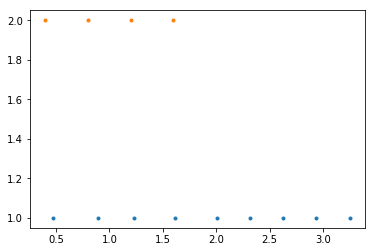

In [82]:
# Plot the result
plt.plot(np.cumsum(productions), np.ones(len(productions)), '.')
plt.plot(ISI_pts, np.ones(len(ISI_pts)) * 2, '.')

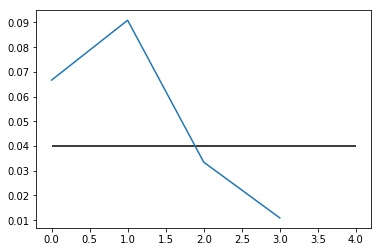

In [68]:
plt.plot(np.cumsum(productions) - ISI_pts)
plt.hlines(0.04, 0, len(ISI_pts))

In [5]:
ISI_pts

array([ 400,  800, 1200, 1600], dtype=int32)

In [44]:
plt.hlines?

## Discrete updating algorithm

### Continuous time definitions
$y_{\textrm{ref}}$ : Reference level

$y_{\textrm{SAM}}$ : Output of SAM

$y_{\textrm{MPM}}$ : Output of of MPM

$I_{\textrm{SAM}}$ : Input to SAM

$I_{\textrm{MPM}}$ : Input to MPM


### Translation into discrete time
$i$ will index *time-points* and *intervals*

$t_p^i$ : time of $i$th production

$t_s^i$ : time of $i$th stimulus

$\textrm{ISI}^i$ = $t_s^{i+1} - t_s^i$

$\textrm{IPI}^i$ = $t_p^{i+1} - t_p^i$

$y_{\textrm{SAM}}^i=I_{\textrm{SAM}}^i*\textrm{ISI}^i$

$I_{\textrm{SAM}}^{i+1}=I_{\textrm{SAM}}^i+\beta(y_{\textrm{ref}}-y_{\textrm{SAM}}^i)$

$I_{\textrm{MPM}}^{i+1} = I_{\textrm{SAM}}^{i+1} + \alpha(y_{\textrm{MPM}}^i-y_{\textrm{out}}^i)$

$\textrm{IPI}^i=y_{\textrm{ref}}/I_{\textrm{MPM}}$

$t_p^{i+1}=t_p^i+\textrm{IPI}^i$

By definition $y_{\textrm{MPM}}^i=y_{\textrm{ref}}$ (output of $y_{\textrm{MPM}}$ at ith production)

The value of $y_{\textrm{out}}^i$ represents the output of the SAM at the time of the $i$th production. During synchronization that will be:

if $t_s^{i}<t_p^i$

$y_{\textrm{out}}^i = I_{\textrm{SAM}}^i*(t_p^{i}-t_s^{i})$

else

$y_{\textrm{out}}^i = I_{\textrm{SAM}}^i*(t_p^i-t_s^{i-1})$


During continuation:

$y_{\textrm{out}}^i = y_{\textrm{SAM}}^\infty$

with $y_{\textrm{SAM}}^\infty$ representing the terminal output of the SAM module.